## Background
- User paths from one vent to the next one os considered as Markov random walk model
- A Markov random walk model is a mathematical framework used to describe a sequence of events where the next step depends only on the current state and not on the sequence of events that preceded it. This type of model is based on the concept of a Markov chain, which is a stochastic process that undergoes transitions from one state to another in a way that satisfies the Markov property.
- In a Markov random walk model, each step in the sequence is determined by a random process, and the probability of transitioning to the next state depends only on the current state. The term "random walk" implies a sequence of steps, each taken in a random direction.  

The key characteristics of a Markov random walk model include:

1. **Markov Property:** The future state depends only on the current state, and not on the sequence of events that preceded it.

2. **Transition Probabilities:** The probabilities associated with moving from one state to another are defined by a transition matrix.

3. **Stochastic Nature:** The randomness in the model is introduced through probabilistic transitions between states.

Markov random walk models are valuable for modeling dynamic systems where randomness plays a significant role, and they provide a way to analyze the long-term behavior of a system based on its transition probabilities.

In [ ]:
!pip install retentioneering

# 1. Loading data

In [1]:
from retentioneering import datasets

# load sample user behavior data:
stream = datasets.load_simple_shop()

In [2]:
stream.to_dataframe().head()

,event_id,event_type,event_index,event,timestamp,user_id
0,9e47e1aa-cada-4aa2-a174-8d533457f3f8,path_start,0,path_start,2019-11-01 17:59:13.273932,219483890
1,9e47e1aa-cada-4aa2-a174-8d533457f3f8,raw,0,catalog,2019-11-01 17:59:13.273932,219483890
2,61525f06-a80d-4e3b-b1e3-040219526ba5,raw,1,product1,2019-11-01 17:59:28.459271,219483890
3,fcfcf43b-7b00-4e58-ae72-cda3922794df,raw,2,cart,2019-11-01 17:59:29.502214,219483890
4,ea7c3a58-8c83-4c28-be18-2caebe5b12d1,raw,3,catalog,2019-11-01 17:59:32.557029,219483890


# 2. Processing the data for further analysis

In [5]:
from retentioneering import datasets

stream_with_sessions = datasets\
    .load_simple_shop()\
    .split_sessions(timeout=(30, 'm')) # split_sessions method creates new column- session_id, in which values ending with the suffix _<int> indicate the ordinal number of each user’s session

stream_with_sessions.to_dataframe().head()

,event_id,event_type,event_index,event,timestamp,user_id,session_id
0,21726ed1-e04c-415f-ad4b-bc07fda7fd97,path_start,0,path_start,2019-11-01 17:59:13.273932,219483890,219483890_1
1,922d7634-292d-4094-8133-8c83cb6bda83,session_start,0,session_start,2019-11-01 17:59:13.273932,219483890,219483890_1
2,21726ed1-e04c-415f-ad4b-bc07fda7fd97,raw,0,catalog,2019-11-01 17:59:13.273932,219483890,219483890_1
3,f9de0add-6a9e-401c-9f1f-7b0330b4d132,raw,1,product1,2019-11-01 17:59:28.459271,219483890,219483890_1
4,89851fa4-4b46-446a-8261-59a04c93921e,raw,2,cart,2019-11-01 17:59:29.502214,219483890,219483890_1


# 3. Descriptive Statistics about dataset

In [7]:
# describe dataframs
stream_with_sessions.describe()

value
category             metric                                 
overall              unique_users                       3751
                     unique_events                        16
                     unique_sessions                    6454
                     eventstream_start   2019-11-01 17:59:13
                     eventstream_end     2020-04-29 12:48:07
                     eventstream_length    179 days 18:48:53
path_length_time     mean                    9 days 11:15:18
                     std                    23 days 02:52:25
                     median                  0 days 00:01:21
                     min                     0 days 00:00:00
                     max                   149 days 04:51:05
path_length_steps    mean                              14.05
                     std                               11.43
                     median                             11.0
                     min                                   5
                     max                                 124
session_length_time  mean                    0 days 00:00:52
                     std                     0 days 00:01:08
                     median                  0 days 00:00:30
                     min                     0 days 00:00:00
                     max                     0 days 00:23:44
session_length_steps mean                               8.16
                     std                                4.28
                     median                              7.0
                     min                                   3
                     max                                  55

## Interpreting above output
1. Overall
- eventstream_start, eventstream_end -  timestamps of the first and the last event in the clicks joueney
- eventstream_length - time distance between event start and end.

2. session_length_time and session_length_steps
- Time-based statistics for user paths and sessions.
- session_length_time - information on the length of users paths in days
- session length steps -  information on the length of users sessions in the number of events.
- All the values in “*_steps” categories are rounded to the 2nd decimal digit, and in “*_time” categories - to seconds.

In [9]:
# Describe events
#stream = datasets.load_simple_shop()
stream.describe_events()

basic_statistics               \
                 number_of_occurrences unique_users   
event                                                 
cart                              2842         1924   
catalog                          14518         3611   
delivery_choice                   1686         1356   
delivery_courier                   834          748   
delivery_pickup                    506          469   
main                              5635         2385   
path_end                          3751         3751   
path_start                        3751         3751   
payment_card                       565          521   
payment_cash                       197          190   
payment_choice                    1107          958   
payment_done                       706          653   
product1                          1515         1122   
product2                          2172         1430   

                                                                   \
                 number_of_occurrences_shared unique_users_shared   
event                                                               
cart                                     0.07                0.51   
catalog                                  0.36                0.96   
delivery_choice                          0.04                0.36   
delivery_courier                         0.02                0.20   
delivery_pickup                          0.01                0.13   
main                                     0.14                0.64   
path_end                                 0.09                1.00   
path_start                               0.09                1.00   
payment_card                             0.01                0.14   
payment_cash                             0.00                0.05   
payment_choice                           0.03                0.26   
payment_done                             0.02                0.17   
product1                                 0.04                0.30   
product2                                 0.05                0.38   

                 time_to_FO_user_wise                                   \
                                 mean              std          median   
event                                                                    
cart                  3 days 08:59:14 11 days 19:28:46 0 days 00:00:56   
catalog               0 days 05:44:21  3 days 03:22:32 0 days 00:00:00   
delivery_choice       5 days 09:18:08 15 days 03:19:15 0 days 00:01:12   
delivery_courier      6 days 18:14:55 16 days 17:51:39 0 days 00:01:28   
delivery_pickup       7 days 21:12:17 18 days 22:51:54 0 days 00:01:34   
main                  3 days 20:15:36  9 days 02:58:23 0 days 00:00:07   
path_end              9 days 11:15:18 23 days 02:52:25 0 days 00:01:21   
path_start            0 days 00:00:00  0 days 00:00:00 0 days 00:00:00   
payment_card          6 days 21:42:26 17 days 18:52:33 0 days 00:01:40   
payment_cash         13 days 23:17:25 24 days 00:00:02 0 days 00:02:18   
payment_choice        6 days 12:49:38 17 days 02:54:51 0 days 00:01:24   
payment_done          7 days 01:37:54 17 days 09:10:00 0 days 00:01:34   
product1              5 days 23:49:43 16 days 04:36:13 0 days 00:00:50   
product2              4 days 06:13:24 13 days 03:26:17 0 days 00:00:34   

                                                   steps_to_FO_user_wise  \
                             min               max                  mean   
event                                                                      
cart             0 days 00:00:01 118 days 16:11:36                  5.51   
catalog          0 days 00:00:00 100 days 08:19:51                  1.30   
delivery_choice  0 days 00:00:03 118 days 16:11:37                  7.78   
delivery_courier 0 days 00:00:06 118 days 16:11:38                  9.96   
delivery_pickup  0 days 00:00:06 114 days 01:24:06                 10.51   
main             0 days 00:00:00  97 days 21:

## Interpreting above output
- number_of_occurrences - the number of occurrences of a particular event in the click path
- unique_users - the number of unique users who experienced a particular event
- unique_sessions - the number of unique sessions with each event
- number_of_occurrences_shared - number_of_occurrences / all_events (raw_events_only, if this parameter = True)
- unique_users_shared - unique_users / all_users
- unique_sessions_shared - unique_sessions / all_sessions

-- time_to_FO_user_wise category - timedelta between path_start and the first occurrence (FO) of a specified event in each user path.  
-- steps_to_FO_user_wise category - the number of steps (events) from path_start to the first occurrence (FO) of a specified event in each user path. If raw_events_only=True only raw events will be counted.  
-- time_to_FO_session_wise category - timedelta between session_start and the first occurrence (FO) of a specified event in each session.  
-- steps_to_FO_session_wise category - the number of steps (events) from session_start to the first occurrence (FO) of a specified event in each session. If raw_events_only=True only raw events will be counted.  


- Agg functions for each first_occurrence* category are: mean, std, median, min, max.

# 4. Distributions
- Often, descriptive statistics are not enough to deeply understand the time-related values, so look into the distributions.

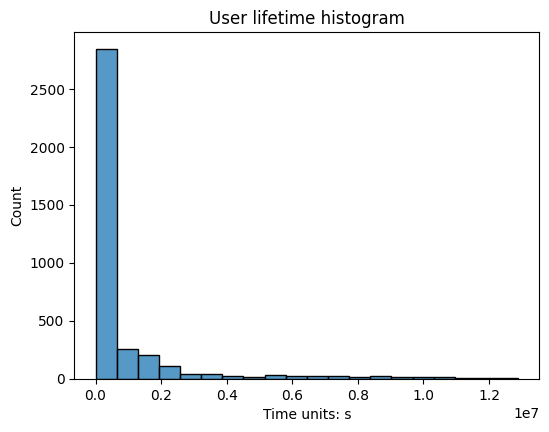

In [10]:
# 4.1 Time-based histogram - User lifetime
# lifetime - time between the first and the last event represented in a user’s beginning and end of a user’s path

stream.user_lifetime_hist()

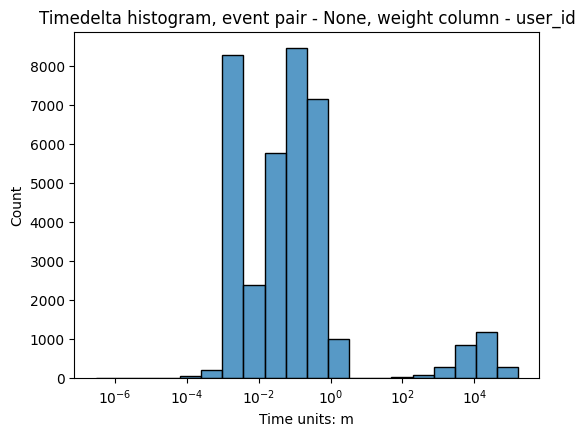

In [12]:
# 4.2 Timedelta between two events
# timedelta_hist() method shows a histogram for the distribution of timedeltas between a couple of specified events

stream.timedelta_hist(log_scale=True, timedelta_unit='m')

# Below graph looks like a bimodal (which is not true as have used log-scale), but these two bells help us to estimate a timeout for splitting sessions.
# It is reasonable to set it to some value between 10 and 100 minutes.

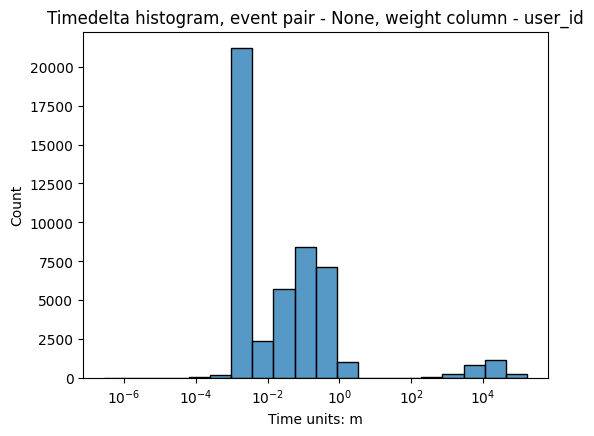

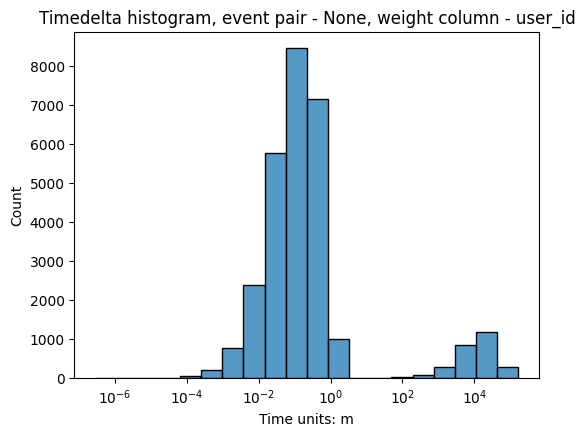

In [13]:
# Adding
stream_with_synthetic = datasets\
    .load_simple_shop()\
    .add_start_end_events()\
    .split_sessions(timeout=(30, 'm'))

stream_with_synthetic.timedelta_hist(log_scale=True, timedelta_unit='m')
stream_with_synthetic.timedelta_hist(
    raw_events_only=True,
    log_scale=True,
    timedelta_unit='m'
)

# second plot there is no high histogram bar located at ~~10^-3, so that the second histogram looks more natural.

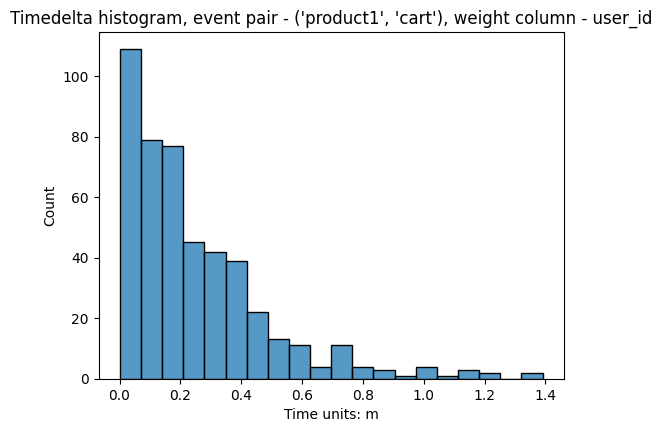

In [14]:
# Visualizing the distribution of timedeltas between two specific events - say if we want to know how much time it takes for a user to go from product1 to cart.
# Then we set event_pair=('product1', 'cart') and pass it to timedelta_hist

stream.timedelta_hist(event_pair=('product1', 'cart'), timedelta_unit='m')

# From the Y scale, we see that such occurrences are not very numerous.
# This is because the method still works with only adjacent pairs of events (in this case product1 and cart are assumed to go one right after another in a user’s path).
# That is why the histogram is skewed to 0.

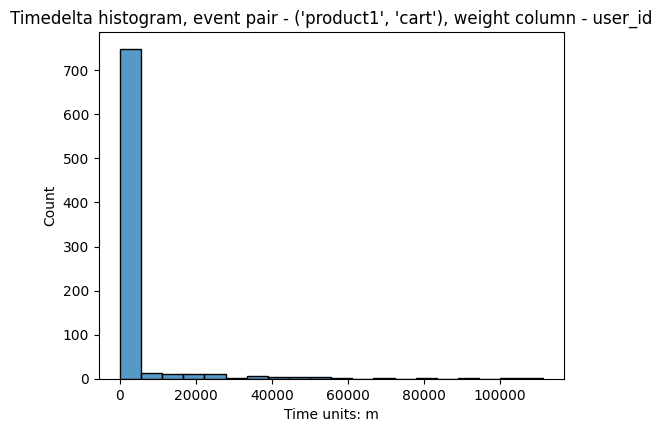

In [15]:
# adjacent_events_only parameter allows us to work with any cases when a user goes from product1 to cart non-directly but passing through some other events:
stream.timedelta_hist(
    event_pair=('product1', 'cart'),
    timedelta_unit='m',
    adjacent_events_only=False
)

# We see that the number of observations has increased, especially around 0. In other words, for the vast majority of the users transition product1 → cart takes less than 1 day
# On the other hand, we observe a “long tail” of the users whose journey from product1 to cart takes multiple days.
# We can interpret this as there are two behavioral clusters: the users who are open for purchases, and the users who are picky.
# However, we also notice that adding a product to a cart does not necessarily mean that a user intends to make a purchase.
# Sometimes users adds an item to a cart just to check its final price, delivery options, etc.

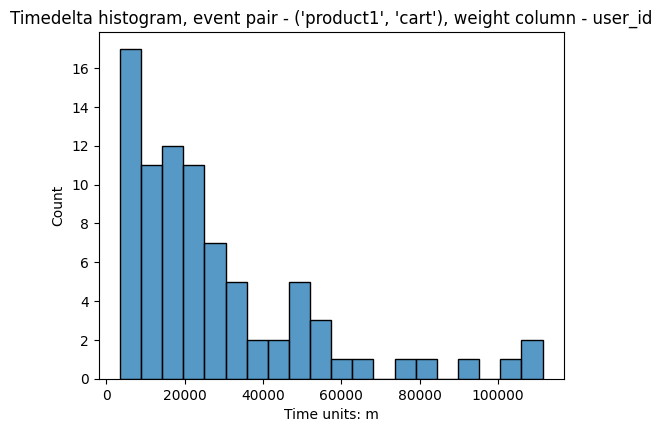

In [16]:
# Due to the fact we have a lot of users with short trajectories and a few users with very long paths our histogram is unreadable.
# To resolve this problem - look separately on different parts of the plot. For that purpose - use parameters lower_cutoff_quantile and upper_cutoff_quantile.
# These parameters specify boundaries for the histogram and will be applied last.
# In the example below, firstly, we keep users with event_pair=('product1', 'cart') and adjacent_events_only=False, and after it we truncate 90% of users with the shortest
# trajectories and keep 10% of the longest.

stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        lower_cutoff_quantile=0.9
    )

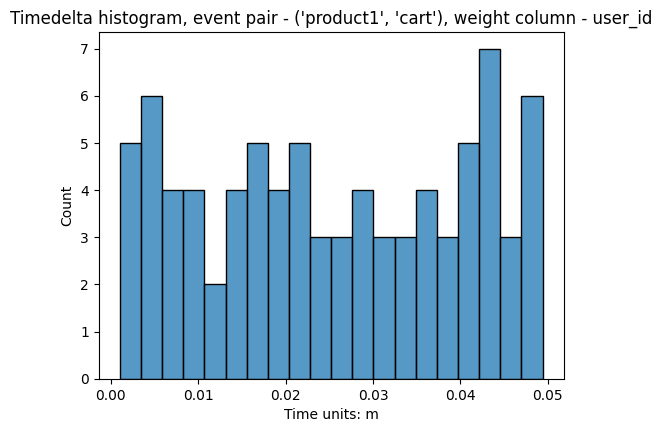

In [17]:
# Here it is the same algorithm, but 10% of users with the shortest trajectories will be kept.
stream.timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        upper_cutoff_quantile=0.1
    )

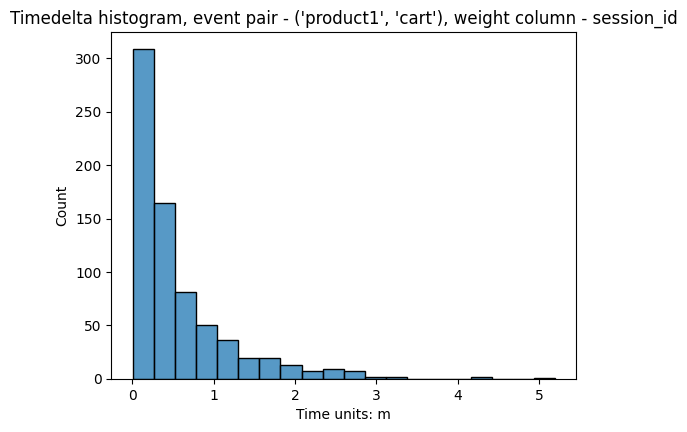

In [18]:
# To look only at events within a user session - if we have already split the paths into sessions, we can use weight_col='session_id'
stream_with_synthetic\
    .timedelta_hist(
        event_pair=('product1', 'cart'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='session_id'
    )

# within a session the users walk from product1 to cart event in less than 3 minutes.

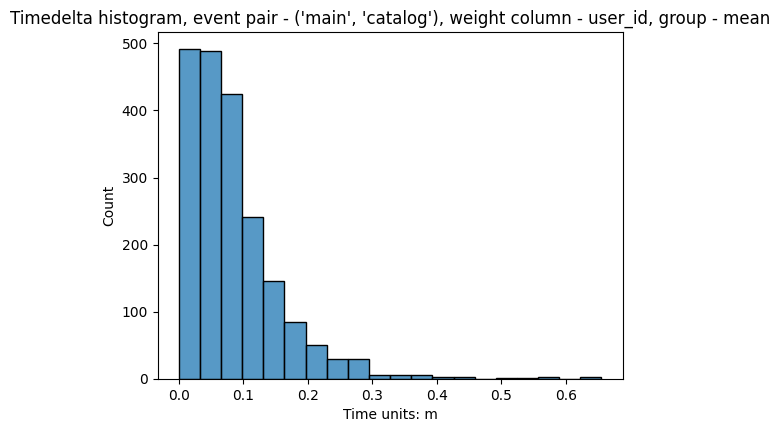

In [19]:
# For frequently occurring events, can aggregate the timedeltas over sessions or users. For example, transition main -> catalog is quite frequent.
# Some users do these transitions quickly, some of them do not. It might be reasonable to aggregate the timedeltas over each user path first (we would get one value per
# one user  at this step), and then visualize the distribution of these aggregated values.
# This can be done by passing an additional argument time_agg='mean' or time_agg='median'.

stream\
    .timedelta_hist(
        event_pair=('main', 'catalog'),
        timedelta_unit='m',
        adjacent_events_only=False,
        weight_col='user_id',
        time_agg='mean'
    )

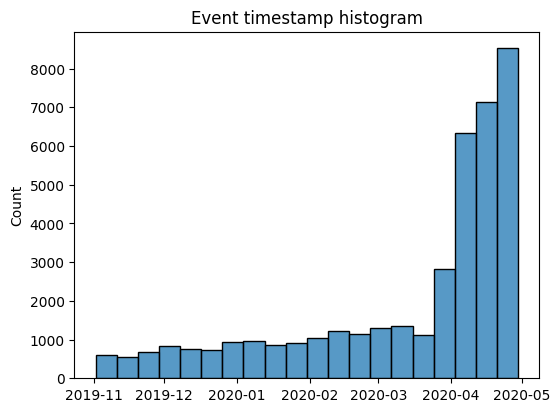

In [20]:
# to know how the events are distributed over time
stream.event_timestamp_hist()

# There is heavy skew in the data towards the period between April and May of 2020. One of the possible interpretations of this fact is that the product worked in beta version
# until April 2020, and afterwards a stable were released so that new users started to arrive much more intense.
# event_timestamp_hist has event_list argument, so we can check this hypothesis by choosing path_start in the event list .

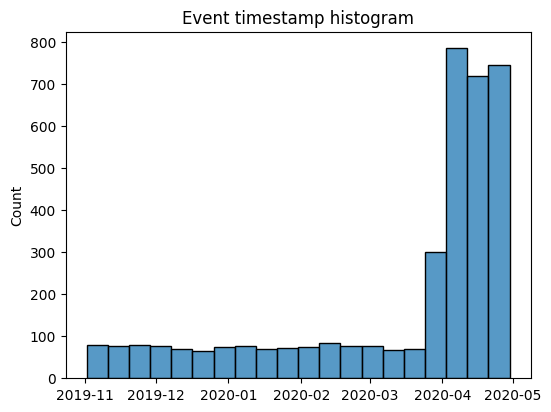

In [21]:
stream\
    .add_start_end_events()\
    .event_timestamp_hist(event_list=['path_start'])

# From this histogram we see that our hypothesis is true. New users started to arrive much more intense in April 2020.

# 5. Event Journey
- It is a weighted directed graph that illustrates how often the users move from one event to another.
- The nodes stand for the unique events.
- A pair of nodes (say, A and B) is connected with a directed edge if the transition A → B appeared at least once.
- Transition means that event B appeared in a user path right after event A.   For example, in path A, C, B there is no transition A → B since event C stands between A and B.

In [23]:
stream.transition_graph()

# The events represented as nodes are connected with the edges. By default, the nodes and edges weights are the number of unique users who experienced the corresponding event
# or transition. All the edges are labeled with these numbers in the graph.
# Ex. there are 1324 unique users who had catalog → cart transitions, 603 users with main → main self-transitions, and there were none with product1 → payment_done transitions
# Thickness of the edges and the size of the nodes are proportional to their weights.

In [24]:
# View in terms of what %age of users transit to next event

stream.transition_graph(
    edges_norm_type='node',
    edges_weight_col='user_id'
)

# 55% of the users transit from product1 event to catalog event
# 38% of the users transit from product1 event to cart event
# 10% of the users transit from product1 event to main event